A really good tutorial [here](https://networkx.org/documentation/stable/tutorial.html). In this notebook I'll just cover my most frequently used scenarios.

In [3]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
from dataclasses import dataclass
%matplotlib inline

## Drawing Graphs

Really good documentation [here](https://networkx.org/documentation/stable/reference/drawing.html).

The main API for drawing a graph is `nx.draw`. This requires a `pos` parameter which gives the co-ordinates of the node positions. There are a bunch of ways to calculate these automatically. Networkx comes with a bunch of pre-built position builders as mentioned [here](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout). By default the `draw` API uses the `spring_layout`.

With `draw` I can draw arrows on DAGs and node labels. But for adding more stuff to the drawing see -
  * [`draw_networkx`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)
  * [`draw_networkx_nodes`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html#networkx.drawing.nx_pylab.draw_networkx_nodes)
  * [`draw_networkx_edges`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html#networkx.drawing.nx_pylab.draw_networkx_edges)
  * [`draw_networkx_labels`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_labels.html#networkx.drawing.nx_pylab.draw_networkx_labels)
  * [`draw_networkx_edge_labels`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edge_labels.html#networkx.drawing.nx_pylab.draw_networkx_edge_labels)

In [5]:
graph = nx.Graph()
graph.add_edge(0, 1)
graph.add_edge(0, 2)
graph.add_edge(0, 3)
graph.add_edge(0, 4)
graph.add_edge(1, 6)
graph.add_edge(1, 3)
graph.add_edge(3, 6)
graph.add_edge(3, 5)

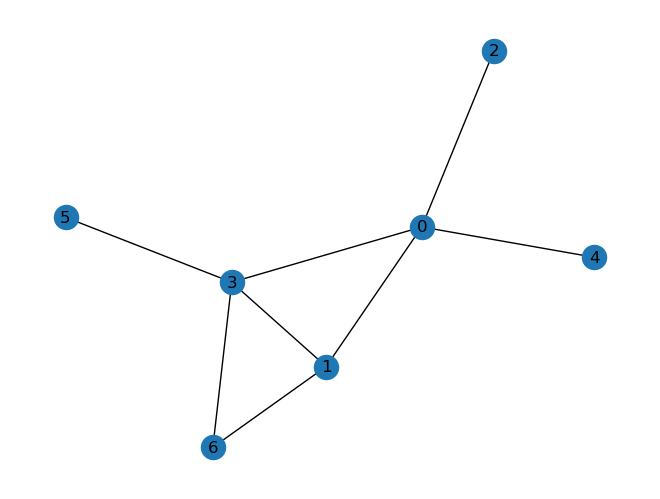

In [6]:
nx.draw(graph, with_labels=True)

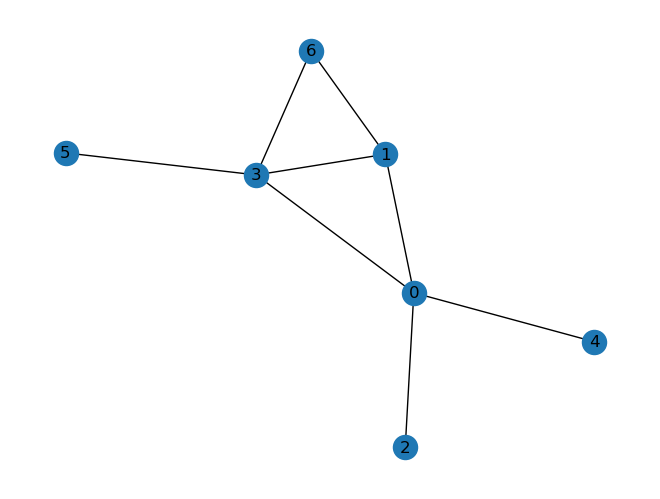

In [7]:
nx.draw(graph, nx.spring_layout(graph), with_labels=True)

Another useful default layout is the planar layout where it draws without any intersecting edges.

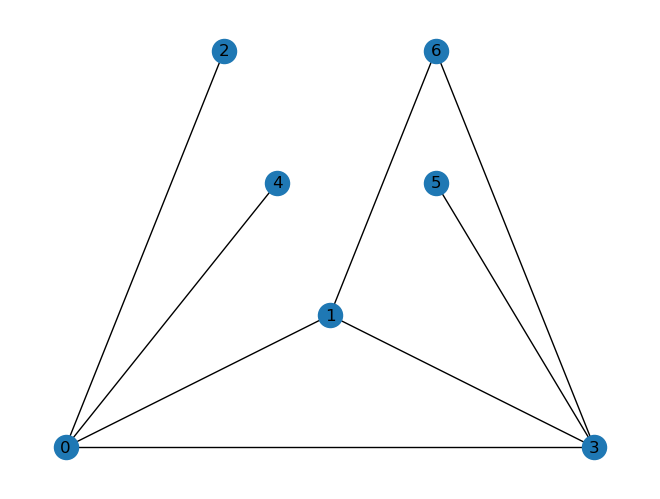

In [8]:
nx.draw(graph, nx.planar_layout(graph), with_labels=True)

A very useful layout is the graphviz layout. Install `pygraphviz` using `conda` and it will just work. I might have to install `brew install graphviz`.

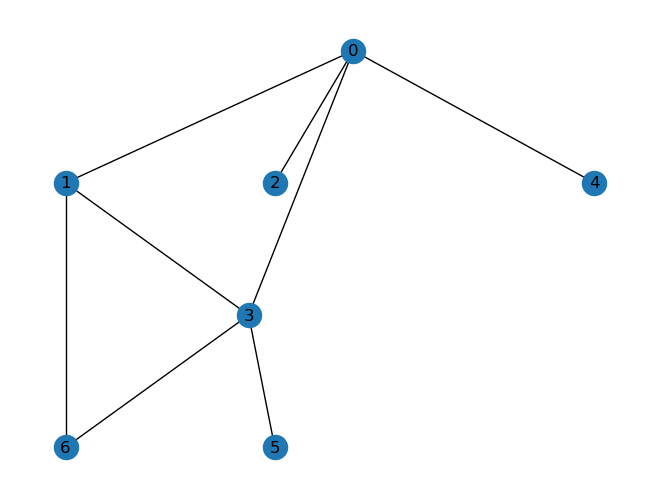

In [9]:
pos = graphviz_layout(graph, prog="dot")
nx.draw(graph, pos, with_labels=True)

Here is an example where `graphviz` layout is really useful. A binary tree is drawn as a binary tree with `graphviz` but as some random tree with spring layout.

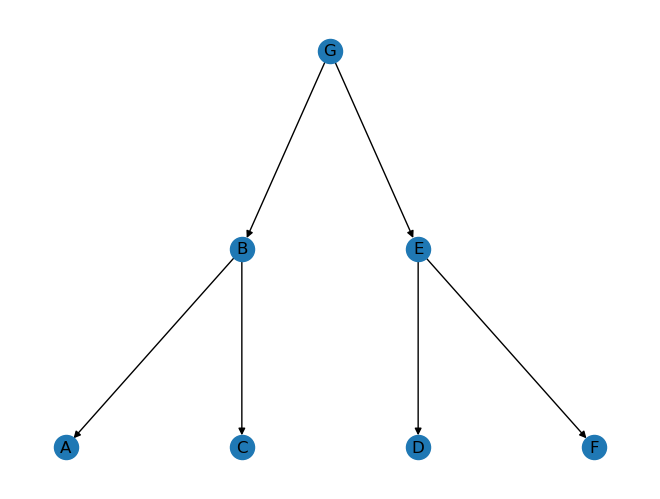

In [10]:
tree = nx.DiGraph()
tree.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
tree.add_edges_from([("B", "A"), ("B", "C"), ("E", "D"), ("E", "F"), ("G", "B"), ("G", "E")])
pos = graphviz_layout(tree, prog="dot")
nx.draw(tree, pos, with_labels=True, arrows=True)

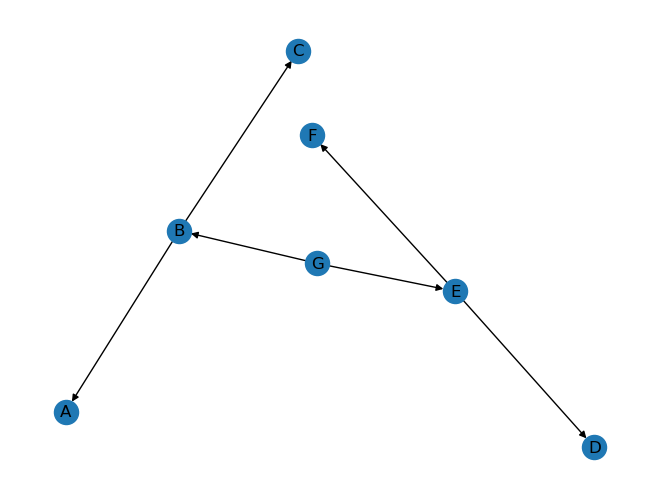

In [11]:
nx.draw(tree, with_labels=True, arrows=True)

## Use Cases

  1. Create a directed graph
  2. Create an undirected graph
  3. 

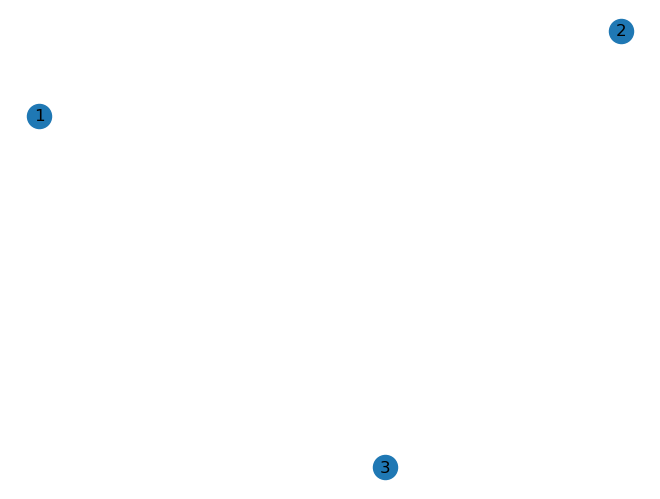

In [12]:
G = nx.Graph()

# This just creates a graph with disconnected nodes.
G.add_node(1)
G.add_nodes_from([2, 3])
nx.draw(G, with_labels=True)

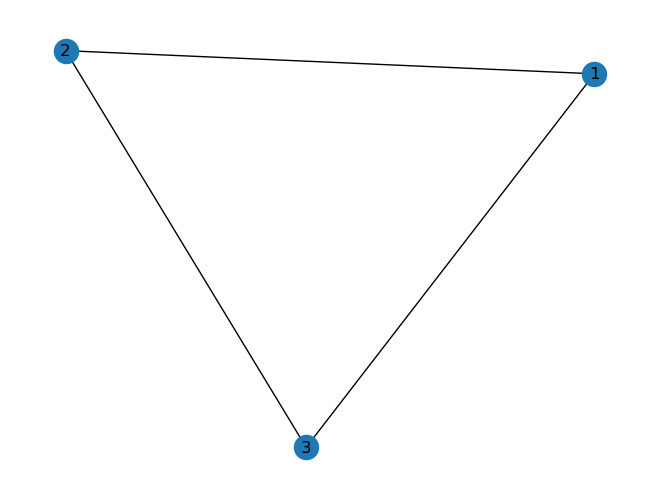

In [13]:
# An edge is represented by by two nodes
G.add_edge(1, 2)
G.add_edges_from([(1, 3), (2, 3)])
nx.draw(G, with_labels=True)

Nodes can be of any type.

In [14]:
@dataclass(eq=True, frozen=True)
class Cookie:
    flavor: str
    calories: int

    def __repr__(self) -> str:
        return f"{self.flavor}:{self.calories}"

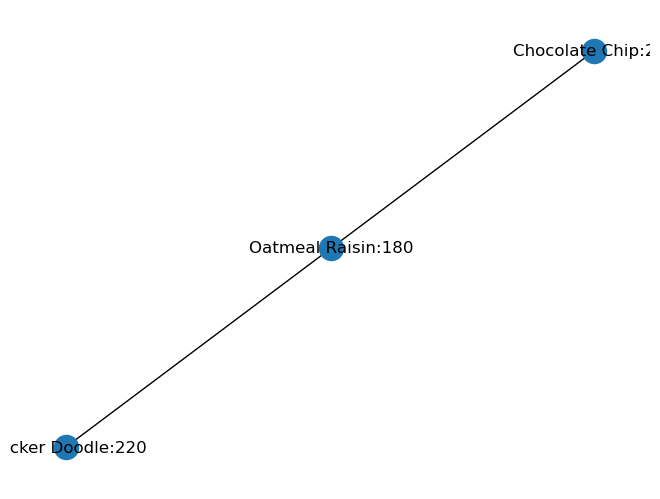

In [15]:
G = nx.Graph()
cc = Cookie(flavor="Chocolate Chip", calories=200)
oatr = Cookie(flavor="Oatmeal Raisin", calories=180)
sd = Cookie(flavor="Snicker Doodle", calories=220)
G.add_nodes_from([cc, oatr, sd])
G.add_edges_from([(cc, oatr), (oatr, sd)])
nx.draw(G, with_labels=True)

Both nodes and edges can have additional attribute attached to them.

In [16]:
G = nx.Graph()
G.add_nodes_from([
    (1, {"color": "red"}),
    (2, {"color": "pink"}),
    (3, {"color": "orange"})
])
G.add_edges_from([(1, 2), (2, 3)], label="Some Label")

In [17]:
for n in G.nodes(data=True):
    print(type(n), n)

<class 'tuple'> (1, {'color': 'red'})
<class 'tuple'> (2, {'color': 'pink'})
<class 'tuple'> (3, {'color': 'orange'})


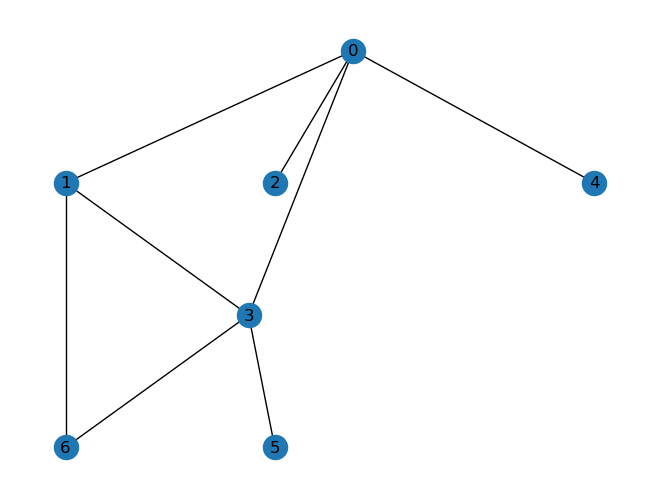

In [18]:
G = nx.Graph()
G.add_edges_from(((0, 1), (0, 2), (0, 3), (0, 4), (1, 3), (1, 6), (3, 5), (3, 6)))
pos = graphviz_layout(G, prog="dot")
nx.draw(G, pos, with_labels=True)

In [22]:
G.nodes

NodeView((0, 1, 2, 3, 4, 6, 5))

In [23]:
for node in G.nodes:
    print(node)

0
1
2
3
4
6
5


In [24]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 3), (1, 6), (3, 5), (3, 6)])

In [25]:
for edge in G.edges:
    print(edge)

(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 3)
(1, 6)
(3, 5)
(3, 6)


In [27]:
for n in G.neighbors(0):
    print(n, end=" ")

1 2 3 4 